In [1]:
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import os
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.modeling.models import Schechter1D
import astropy.constants as c
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [6]:
from matplotlib import rc                # Establece parámetros iniciales al grupo
rc('text', usetex=False)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # Controla tamaño de texto por defecto
plt.rc('axes', titlesize=BIGGER_SIZE)    # Tamaño de las fuentes de los títulos
# Tamaño de las fuentes de los ejes x e y
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # Tamaño de las leyendas
# Tamaño de la fuente del título de la figura
plt.rc('figure', titlesize=BIGGER_SIZE)

In [3]:
table_l = Table.read("cat_gazpar_match.fits")

In [4]:
table_b= Table.read("combined.fits")

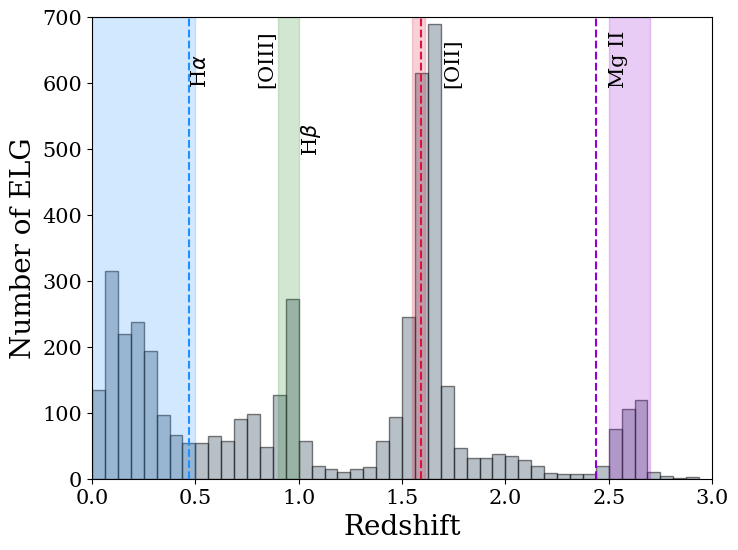

In [67]:
fig,ax=plt.subplots(figsize=(8,6), dpi=100)

bins = np.arange(0,3,0.0625)


ax.hist(table_b['redshift_50'], bins =bins, histtype ='bar', alpha = 0.5, 
         color = 'slategray',ec = 'k')
ax.vlines(0.47,0,1000, linestyle ='dashed', color = 'dodgerblue')
ax.axvspan(0, 0.5, alpha=0.2, color='dodgerblue')
ax.text(0.48, 600, r'H$\alpha$', size = 15, rotation='vertical')

#ax.vlines(0.98,0,1000, linestyle ='dashed', color = 'forestgreen')
#ax.axvspan(0.86,1.05, alpha=0.2, color='forestgreen')
ax.text(1, 500, r'H$\beta$', size = 15, rotation='vertical')

#ax.vlines(0.93,0,1000, linestyle ='dashed', color = 'forestgreen')
ax.axvspan(0.9, 1.0, alpha=0.2, color='forestgreen')
ax.text(0.8, 600, r'[OIII]', size = 15, rotation='vertical')

ax.vlines(1.59,0,1000, linestyle ='dashed', color = 'crimson')
ax.axvspan(1.55, 1.61, alpha=0.2, color='crimson')
ax.text(1.7, 600, r'[OII]', size = 15, rotation='vertical')


ax.vlines(2.44,0,1000, linestyle ='dashed', color = 'darkviolet')
ax.axvspan(2.5, 2.7, alpha=0.2, color='darkviolet')
ax.text(2.5, 600, r'Mg II', size = 15, rotation='vertical')

# ax.vlines(2.44,0,1000, linestyle ='dashed', color = 'crimson')
# ax.axvspan(1.30, 1.9, alpha=0.2, color='crimson')
# ax.text(2.5, 650, r'MgII', size = 15, rotation='vertical')

#plt.vlines(0.2,0,1000, linestyle ='dashed', color = 'crimson')
ax.set_xlim(0,3)
ax.set_ylim(0,700)
ax.set_xlabel('Redshift')
ax.set_ylabel('Number of ELG')
plt.show()

In [65]:
mask_mgII = (table_b['redshift_50'] > 2.5) & (table_b['redshift_50'] < 2.7)

bag_mgII = table_b[mask_mgII]

lep_mgII = table_l[mask_mgII]

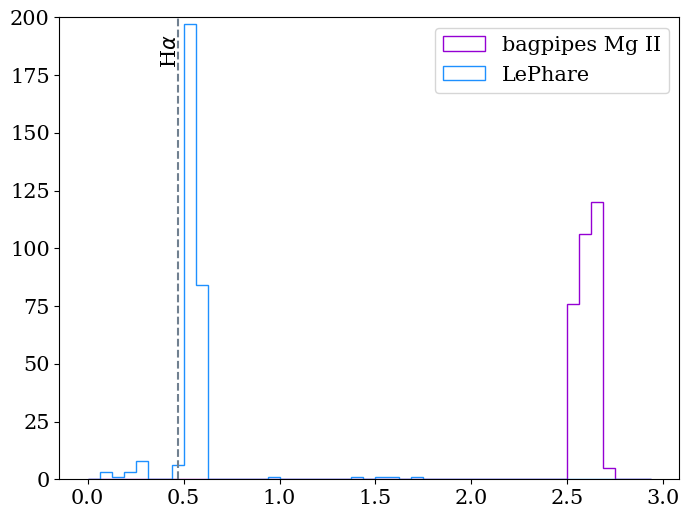

In [64]:
fig,ax=plt.subplots(figsize=(8,6), dpi=100)

bins = np.arange(0,3,0.0625)


ax.hist(bag_mgII['redshift_50'], bins =bins, histtype ='step', alpha = 1, 
         color = 'slategray',ec = 'darkviolet', label = 'bagpipes Mg II')

ax.hist(lep_mgII['Z_BEST'], bins =bins, histtype ='step', alpha = 1, 
         color = 'slategray',ec = 'dodgerblue', label = 'LePhare')

ax.vlines(0.47,0,500, linestyle ='dashed', color = 'slategray')
ax.text(0.38, 180, r'H$\alpha$', size = 15, rotation='vertical')

ax.set_ylim(0,200)

plt.legend()
plt.show()

In [39]:
#0, 0.49

mask_Ha = (table_b['redshift_50'] > 0) & (table_b['redshift_50'] < 0.49)

bag_Ha = table_b[mask_Ha]

lep_Ha = table_l[mask_Ha]

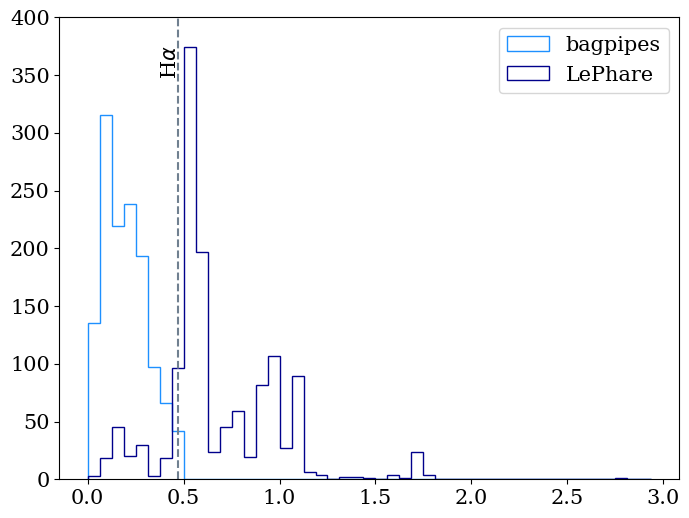

In [62]:
fig,ax=plt.subplots(figsize=(8,6), dpi=100)

bins = np.arange(0,3,0.0625)


ax.hist(bag_Ha['redshift_50'], bins =bins, histtype ='step', alpha = 1, 
         color = 'slategray',ec = 'dodgerblue', label = 'bagpipes')

ax.hist(lep_Ha['Z_BEST'], bins =bins, histtype ='step', alpha = 1, 
         color = 'slategray',ec = 'darkblue', label = 'LePhare')

ax.vlines(0.47,0,500, linestyle ='dashed', color = 'slategray')
ax.text(0.38, 350, r'H$\alpha$', size = 15, rotation='vertical')

ax.set_ylim(0, 400)

plt.legend()
plt.show()

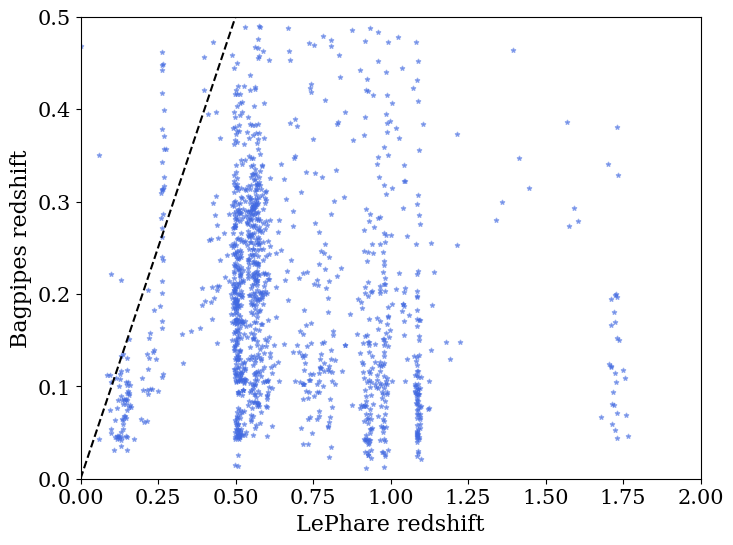

In [59]:
fig,ax=plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)
x = np.linspace(0,3,1000)
ax.scatter(lep_Ha['Z_BEST'], bag_Ha['redshift_50'], c ='royalblue', s =10, marker = '*', alpha = 0.5)
ax.set_xlabel('LePhare redshift', size = 16)
ax.set_ylabel(r'Bagpipes redshift', size = 16)
ax.plot(x,x, color = 'black', linestyle ='dashed')
ax.set_xlim(0,2)
ax.set_ylim(0,0.5)

plt.show()